# Exercises and Homework for week 3

## physics725: Scientific Programming with Python (SS 2024)

Oliver Cordes & Thomas Erben

---

Homework is due on **Thursday, 02/05/2024, 11:55pm**

 * You only learn a programming language by actively praticing and using it! We therefore **strongly** advise you to work on the homework problems.
 * Please discuss the problems with your student peers and with your tutor.
 * Your code(s) need(s) to be well and appropriately commented!
 * Submit this notebook and, if necessary, additional files in a `zip`-archive with the naming scheme provided by your tutor.

**Topics of this exercise:**
 * Git 101
 * First contact with `numpy`-arrays
 * Basic plots with matplotliba

**Your group number here please:**  Group XX

## 1. Lecture Review (0 points)

If you did the lecture review questions [06_Review_questions.ipynb](06_Review_questions.ipynb) (strongly recommended!): 
Please discuss with your tutor and your group any issues/problems you had with them.

---

## 2. Practical git (5 points)

This is the list of tasks you __need__ to do to finish this exercise. It looks complicated but it is a step by step instruction.

### 2.1. Setup your gitlab-Account

Create and setup an account in the HRZ-gitlab instance:

 * generate a ssh-private-public-key-pair (with ssh-keygen in a terminal, if you don't have one)
 * login into https://gitlab.uni-bonn.de/ , click the  *SSO Uni Bonn* button. Fill in your Uni-ID credentials in the shibboleth-formular
 * after login you will be in your main account page, in which you see all your projects (own or cooperation projects), click on the field right of the top `+`-sign to open your account preference
 * open `Edit profile->SSH Keys` page from the left menu
 * click `Add new key` and upload your __public__-part of your previously generated ssh-private-public-key-pair (remove the date in the `Expiration date` field!)

### 2.2. Create your own repository

We recommend that you create your own repository for this course (not only for this homework sheet).

* Return to your main page, click on the uni-bonn-logo on the top left side
* Click the top right button `New project`, choose `Create blank project`
* Project name should be `Physics725`, the repository should be `private` -> Press `Create Projekt`

Now you need to give your tutor the access right to the repository:

* ask your tutor for his `Uni-ID` on gitlab
* use the menu in left sidebar `Manage->Members`; click on `Invite members`
* put the tutors ID in the `Username` field and select the role `Developer`; click `Invite`

Your tutor will get an invitation message.

### 2.3. Work with the repository

Whenever you login into gitlab you will see __all__ of your repositories and can select the webpage of your `Physics725` repository.

**Your task:**
 1. Click on `Code` and then copy the text from `Clone with SSH` or using the copy-button (text will be in the desktop clipboard)
 2. open a terminal and clone this git-repository while pasting the correct URL (e.g. `git@gitlab.uni-bonn.de:<YOURUNIID>/physics725.git`)
 3. Change your personal entries, Name and UniID which you have in eCampus (!), in the repositories, using `git config` 
 4. Create a file `this_is_a_textfile.txt`, add an additional line with some text, add the file to the git system
 5. Commit the changes and push the results back to the server

In [ ]:
# please add one git-URL for your homework group to check

**Hints:**
 * only one of any homework group need to do this task, but we recommend that everybody should do this!

### 2.4. Update the repository

In this small task you should update the repository to demonstrate that you understood the git basics.

**Your task:**

 1. Move the file `this_is_a_textfile.txt` in a new subfolder `test1`
 2. Create a second folder `test2` and create a new file `this_is_another_textfile.txt` with at least one text line
 3. Commit all changes and push the results back to the server

**Hints:**
* please do **2.3.** and **2.4.** with two individual steps, we can proove it!

---

## 3. Numerical Integration (15 points)

We want to estimate the integral:

$$\int_1^2 \frac{1}{x}{\rm d} x = \log 2 \approx 0.693147 $$

For the calculation we want to compare different mathematical methods. Be $f(x)$ a continuous function on the interval $I=[a;b]$. Be $x_i$ with $a < x_0 < \dots < x_n < b$ a decomposition of the interval $I$. The integral area below the function can be divided into a finite number of small areas $A_i$. The sum of these areas approximates the integral:
$$ \int_a^bf(x)\,{\rm d}x\approx \sum_{i=0}^{n-1} A_i$$

These numerical approximations can be reduced in the way how the small areas are calculated:
1. The simplest approximation is the use of the Riemann sums. The area below the function $f$ will be described by a series of rectangles. One rectangle between $x_i$ and $x_{i+1}$ can be calculated with:
    $$A_i = (x_{i+1}-x_i) \cdot f\left(\frac{x_i+x_{i+1}}2\right)$$
2. Instead of a rectangle one can also define a trapezium:
    $$A_i = (x_{i+1}-x_i) \cdot \left( \frac{f(x_i)+f(x_{i+1})}{2} \right)$$
3. A further approximation is the Simpsons method in which the part below the function is approximated by a parabel. The area can be calculated by:
    $$A_i = (x_{i+1}-x_i)\cdot \frac{1}{6} \left( f(x_i) + 4\cdot f\left(\frac{x_i+x_{i+1}}2\right) + f(x_{i+1}) \right)$$
    
    
To illustrate the different approximations, the small areas for each method are drawn for the $f(x)=\frac{1}{x}$ function:
<table>
<tr>
    <td>
        <img src="figs/riemann.png">
    </td>
    <td>
        <img src="figs/trapez.png">
    </td>
    <td>
        <img src="figs/simpson.png">
    </td>
</tr>
</table>
    
**Your tasks:**

 Implement each of the approximation for the given integral with numpy arrays and compare the results. Which method gives the best value in comparison to the exact value of $\log 2$ (use a print command for your decision!)?  You can assume a separation of the intervall $I=[a;b]$ in $n=50$ equally spaced parts. 
 
**Hints:**

For the calculation of the function values $f(x)$ we pre defined a simple function which you can use. You can use this function with ```y=f(x)```. ```x``` can be a float or integer variable or a numpy-array!

In [1]:
import numpy as np

"""

Using the EXACT number of log2 is not possible since it is irrational 
however numpy implementation of the log function is possibly a good comparison

"""
LOG2 = np.log(2)

def f(x):
    """The simple function that returns 1/x."""
    return 1/x

def Riemann_sums(f,n,a,b):
    x_vals = np.linspace(a, b, n)
    integral = 0 
    for i in range(n-1):
        #summing up the rectangles
        integral+= (x_vals[i+1] - x_vals[i])*f((x_vals[i+1] + x_vals[i])/2)
    
    return integral

def Trapez_sums(f,n,a,b):
    x_vals = np.linspace(a, b, n)
    integral = 0 
    for i in range(n-1):
        #summing up the trapezes
        integral+= (x_vals[i+1] - x_vals[i])*(f(x_vals[i+1]) + f(x_vals[i]))/2
    return integral

def Simpson_sums(f,n,a,b):
    x_vals = np.linspace(a, b, n)
    integral = 0 
    for i in range(n-1):
        #summing up the simpsons xD
        integral+= (x_vals[i+1] - x_vals[i])*(f(x_vals[i+1])+ 
                                              4*f((x_vals[i+1] + x_vals[i])/2)
                                              + f(x_vals[i]))/6
    
    return integral

print('Riemann: '+ str((Riemann_sums(f,50,1,2)) -LOG2))
print('Trapez: '+str(Trapez_sums(f,50,1,2)-LOG2))
print('Simpson: '+str(Simpson_sums(f,50,1,2)-LOG2))

Riemann: -1.3014224712670774e-05
Trapez: 2.6029465566623777e-05
Simpson: 3.3871361271309297e-10


---

## 4. Numerical gauss function (15 points)

For the next exercise a Gaussian distribution with zero mean and a variance $\sigma = 1$ is given by

$$ y(x) = C \exp \left(-\frac{x^2}{2}\right) $$

The constant C is fixed so that the integral from $-\infty$ to $\infty$ is 1.

**Your tasks:**
 * make a complete plot of the distribution function against x, with $C=1$. Choose a useful interval.
 * choose one of the methods from exercise 2 to numerically integrate the function over a wide enough range to capture virtually all of the important area. Use the integral result to determine the value of $C$. Compare your results with the correct value of $C$ (use again $\sigma = 1$).
 * what fraction of the area is contained between `-1` and `1`?
 * what fraction of the area is contained between `-3` and `3`? Give the meaning of both fractions!


**Hints**:
 * you can use one code cell for all solutions
 * you can choose a good interval for the numerical integration from the first plot
 * give the result of the fractions of the area in percent of the total area of the integral

In [1]:
import numpy as np

# Define the function
def f(x):
    return 1 / x

# Define the interval [a, b] and the number of partitions
a = 1
b = 2
n = 50

# Create an array of equally spaced points
x_values = np.linspace(a, b, n)

# Calculate the width of each partition
dx = (b - a) / n

# Riemann Sum approximation
riemann_sum = np.sum(dx * f((x_values[:-1] + x_values[1:]) / 2))

# Trapezoidal Rule approximation
trapezoidal_sum = np.sum(dx * (f(x_values[:-1]) + f(x_values[1:])) / 2)

# Simpson's Rule approximation
simpsons_sum = np.sum(dx / 6 * (f(x_values[:-1]) + 4 * f((x_values[:-1] + x_values[1:]) / 2) + f(x_values[1:])))

# Exact value of the integral
exact_value = np.log(2)

# Print the results
print("Riemann Sum approximation:", riemann_sum)
print("Trapezoidal Rule approximation:", trapezoidal_sum)
print("Simpson's Rule approximation:", simpsons_sum)
print("Exact value of the integral (log 2):", exact_value)

Riemann Sum approximation: 0.679271483008528
Trapezoidal Rule approximation: 0.6793097458250015
Simpson's Rule approximation: 0.6792842372806858
Exact value of the integral (log 2): 0.6931471805599453


---

## 5. Traps while plottting (5 Points)

Somebody wants to plot the function $f(x) = \frac{\sin(30x)}x$ with $x\in [1,10]$. The submitted code looks like:

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(1, 10, 100)
y = np.sin(30. * x) / x

fig, ax = plt.subplots()

ax.plot(x, y, linewidth=2.0)

Obviously the result was not really wanted. *What's wrong with the code?*

A lecturer creates this plot to demonstrate a better solution:

<img src="figs/trapsplotting.png" style="width:50%"/>

**Tasks**:

Recreate the plot which includes the faulty (blue plot) and corrected code (red plot) for the function $f(x) = \frac{\sin(30x)}x$ with $x\in [1,10]$. The corrected plot is shifted by `+2` on the y-axis. Please create also the legend box and all labels. Write the reason why the original code is not correct as a comment into the code.

Text(0.5, 1.0, 'Traps while plotting')

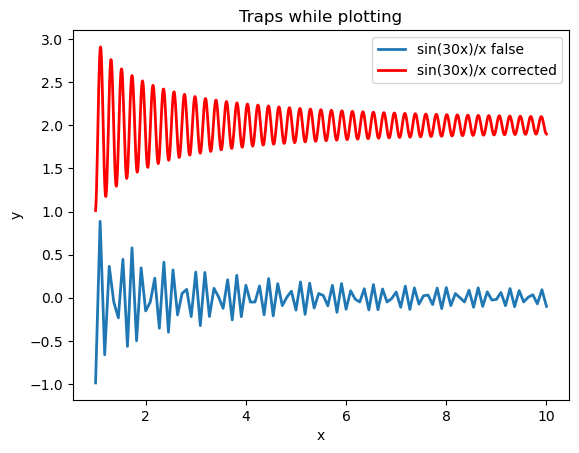

In [2]:
# Your solution here please
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(1, 10, 100)
y = np.sin(30. * x) / x


"""
there are to few points to make it
look smooth -> increase by factor of 10
"""
x_corr = np.linspace(1, 10, 1000)
y_corr = np.sin(30. * x_corr) / x_corr +2

fig, ax = plt.subplots()

ax.plot(x, y, linewidth=2.0, color='C0', label='sin(30x)/x false')
#plot new function
ax.plot(x_corr, y_corr, linewidth=2.0, color='red', label='sin(30x)/x corrected')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Traps while plotting")

---